<a href="https://colab.research.google.com/github/BrendaNahir/Colab/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud    import WordCloud
%matplotlib inline
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import LatentDirichletAllocation as LDA

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import Normalizer

In [ ]:
import spacy

In [ ]:
!python -m spacy download es_core_news_sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd
import numpy as np
from pprint import pprint

df = pd.read_csv('/content/drive/MyDrive/ArchivosCSV/df_ExpTitulosMayusculas.csv', sep=',',  encoding='utf-8')
#convierte en string los datos de la columna text
df1 = df['expediente'].apply(str)

In [60]:
prueba = df1[0]

In [8]:
dfnr= pd.DataFrame(df1)
dfnr

,expediente
0,Informa a continuacion:\nPERITO MEDICO PRESENT...
1,JUZG.\nPERITO MEDICO PRESENTA INFORME MEDICO-P...
2,II.- HISTORIA CLINICA\nPERITO MEDICO PRESENTA ...
3,"JNT , Sito en Calle Lavalle , Ciudad Autonom..."
4,PRESENTA DICTAMEN PERICIAL\nSeñor Juez:\nEl Dr...
...,...
854,OBSERVA PERICIA MEDICA. CUESTIONA ESTIMACION D...
855,PERITO MEDICO PRESENTA PERITACION MEDICOLEGAL\...
856,PERITO MEDICO PRESENTA PERITACION MEDICO LEGAL...
857,\n-3-\nTRABAJO\nPRESENTO PERICIA MEDICA - ADJU...


In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopws = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer ('spanish')

In [11]:
nlp= spacy.load('es_core_news_sm')

In [12]:
stop_ws= nlp.Defaults.stop_words
stop_ws

{'a',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 'cuando',
 'cuanta',
 'cuantas',
 'cuanto',
 'cuantos',
 'cuatro',
 'cuenta',
 'cuál',
 'cuáles',
 'cu

In [13]:
import re
def clean(doc):

  doc = doc.lower().replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u') # removemos minúsculas y tildes
  doc = re.sub('[^a-zA-Z]',' ', doc) #removemos caracteres especiales y numeros.

  doc = [word for word in doc.split(' ') if word not in stop_ws] #removemos stopwords
  doc = ' '.join(doc)
  #doc = [stemmer.stem(word) for word in doc.split(' ')]
  #doc = ' '.join(doc)
  return doc

In [15]:
dfnr['texto_limpio']= dfnr.expediente.apply(clean)
dfnr.sample(10)

,expediente,texto_limpio
809,Expediente /\nTRABAJO\nRSP PISO\nPERITO MEDIC...,expediente trabajo rsp piso perito medicopr...
91,JUZGADO NAC. DE 1ª. INSTANCIA DEL TRABAJO N°\n...,juzgado nac instancia trabajo n perito m...
417,PERITO MEDICO PRESENTA PERICIA\nJuzgado Nacion...,perito medico presenta pericia juzgado naciona...
812,PERITO MEDICO PRESENTA INFORME.\nJUZGADO NACIO...,perito medico presenta informe juzgado nacion...
54,PERITO PSICOLOGA PRESENTA DICTAMEN\nJuzgado Na...,perito psicologa presenta dictamen juzgado nac...
645,PERITO MEDICO PRESENTA PERITACION\nExpte.N°: /...,perito medico presenta peritacion expte n ...
627,EXPEDIENTE /\nJuzgado Nacional de 1ra Instanci...,expediente juzgado nacional ra instancia tr...
639,JUZGADO NAC. DE 1ª. INSTANCIA DEL TRABAJO N°\n...,juzgado nac instancia trabajo n lavalle ...
33,"El que suscribe, Ricardo Jose Beres, medico le...",suscribe ricardo jose beres medico legista p...
252,PERITO PSICOLOGA PRESENTA INFORME\nTribunal: J...,perito psicologa presenta informe tribunal ju...


In [16]:
dfnr.texto_limpio[0]

'informa continuacion  perito medico presenta informe pericial autos   boiero franco ivan c swiss medical art  s accidente   ley especial  expediente     i proemio  sr  juez nacional  hortas maria andrea s  perito medico oficio siguientes autos  domicilio constituido calle austria    piso dpto   capital z   tel    domicilio electronico mashortas        cumplimiento dispuesto  referente presentes autos examinado boiero franco ivan tomaron momento examen clinico actual consideraron capacidad generica particular puntos pericia solicitados partes   ii antecedentes interes medico legal    h encontraba camino trabajo cruzar calle piso piedra pie izquierdo queda trabado girando cuerpo sufriendo entorsis tobillo izquierdo consecuencia fuerte dolor aviso empleador realiza correspondiente denuncia art realizan estudios radiograficos indican reposo kinesiologia otorgandole alta medica incapacidad  cabe destacar previo accidente presento ingresos art dolencias zona denunciada   jamas realizo exame

In [ ]:
!pip install spacy==2.3

In [19]:

from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
def lematize(tok):
  lookups = Lookups()
  lookups.add_table("lemma_rules", {"noun": [["s", ""]]})
  lemmatizer = Lemmatizer(lookups)

  if tok.pos_== 'VERB':
    tok= tok.lemma_
  elif tok.pos_=='NOUN':
    tok = lemmatizer(tok.text, tok.pos_)[0]
  else:
    tok
  return tok

In [20]:
lemm = []
for sent in dfnr.texto_limpio:
    tokens = nlp(sent)
    lem= [lematize(tok)for tok in tokens]
    lem = ' '.join(tok.text for tok in tokens)
    lemm.append(lem)

#### Vectorización

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer( stop_words=stop_ws ,max_df=0.90, min_df=3, ngram_range=(1,1))
Xtf = tfvectorizer.fit_transform(lemm)

In [22]:
Xtf.shape

(859, 18746)

In [23]:
## reduccion de dimensionalidad : quitamos outliers? (valores atipicos)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, algorithm='randomized', random_state=12)
normalizer = Normalizer(copy=False) # kmeans de sklearn no tiene dist coseno
lsa = make_pipeline(svd, normalizer)

X1 = lsa.fit_transform(Xtf)

#### Análisis de clusters: KMeans

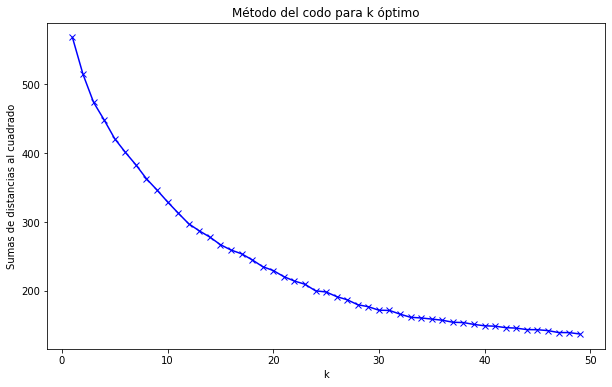

In [24]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, verbose=False, random_state=12, algorithm = 'full')
    km = km.fit(X1)
    Sum_of_squared_distances.append(km.inertia_)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sumas de distancias al cuadrado')
plt.title('Método del codo para k óptimo')
plt.savefig('elbowmethod.jpg')
plt.show()

In [29]:
km_clust = KMeans(n_clusters=8, init='k-means++', n_init=10, verbose=False, random_state=12)
km_clust.fit(X1)
dfnr['label']= km_clust.labels_
dfnr

,expediente,texto_limpio,label
0,Informa a continuacion:\nPERITO MEDICO PRESENT...,informa continuacion perito medico presenta i...,4
1,JUZG.\nPERITO MEDICO PRESENTA INFORME MEDICO-P...,juzg perito medico presenta informe medico pe...,5
2,II.- HISTORIA CLINICA\nPERITO MEDICO PRESENTA ...,ii historia clinica perito medico presenta p...,1
3,"JNT , Sito en Calle Lavalle , Ciudad Autonom...",jnt sito calle lavalle ciudad autonoma a...,1
4,PRESENTA DICTAMEN PERICIAL\nSeñor Juez:\nEl Dr...,presenta dictamen pericial or juez dr daniel...,6
...,...,...,...
854,OBSERVA PERICIA MEDICA. CUESTIONA ESTIMACION D...,observa pericia medica cuestiona estimacion i...,1
855,PERITO MEDICO PRESENTA PERITACION MEDICOLEGAL\...,perito medico presenta peritacion medicolegal ...,6
856,PERITO MEDICO PRESENTA PERITACION MEDICO LEGAL...,perito medico presenta peritacion medico legal...,4
857,\n-3-\nTRABAJO\nPRESENTO PERICIA MEDICA - ADJU...,trabajo presento pericia medica adjunto...,1


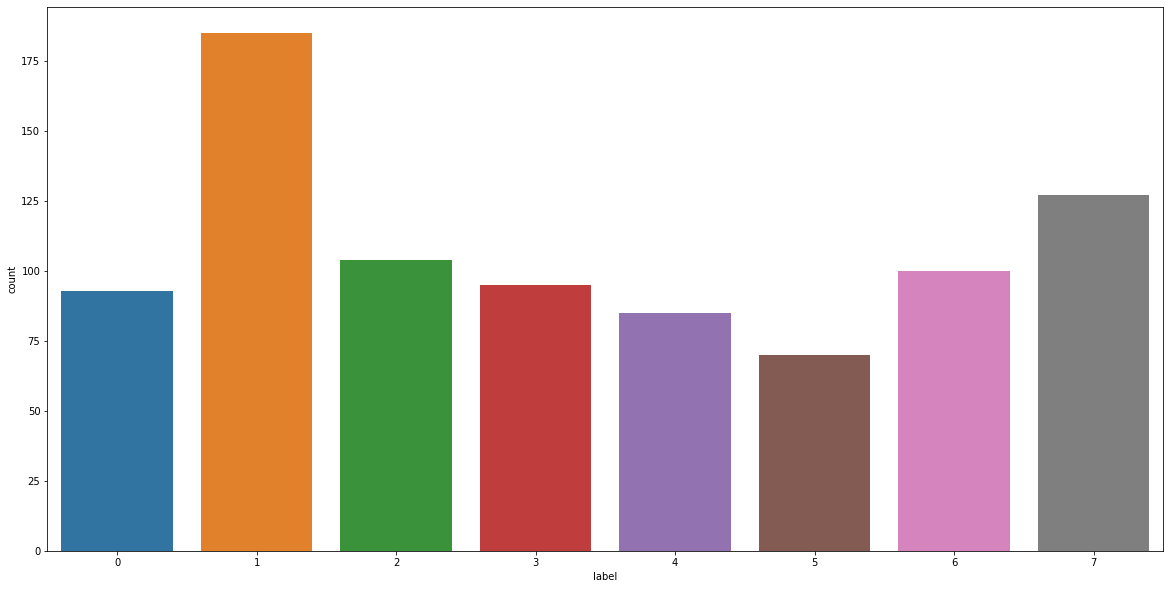

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'label', data=dfnr)
plt.savefig('cluster_frec_kmeans.jpg')

In [31]:
k=km_clust.n_clusters
BOLD = '\033[1m'
END = '\033[0m'
for i in range(k):

  print (BOLD+'\n Frases del Cluster {}\n'.format(i)+END,end='\n')
  print (dfnr[dfnr.label==i].texto_limpio[0:10])


 Frases del Cluster 0

12    expediente   trabajo lavalle    piso perito me...
14    casillero   capital federal presenta respetuos...
28    expediente   trabajo peron    piso perito medi...
36    expediente    trabajo cerrito      perito medi...
50    lavalle  casillero   capital federal expedient...
52     casillero   capital federal expediente    tra...
57    expediente    trabajo rsp piso sr  juez  perit...
77    expediente    trabajo peron piso sr  juez  per...
86    expediente    trabajo n  parana   perito medic...
87    expediente    trabajo rsp    perito medico pre...
Name: texto_limpio, dtype: object

 Frases del Cluster 1

2     ii   historia clinica perito medico presenta p...
3     jnt    sito calle lavalle    ciudad autonoma a...
5     perito contador presenta pericia sr  juez juan...
13    juzgado nacional trabajo diagonal roque saenz ...
21         trabajo perito medica presenta informe   ...
29    autos  martinez elias c  prevencion art  s  ac...
32      fecha     trab

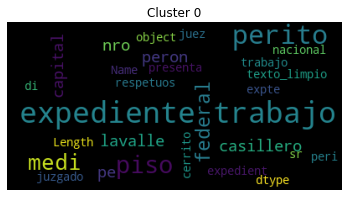

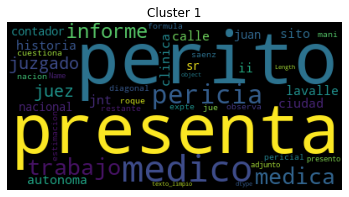

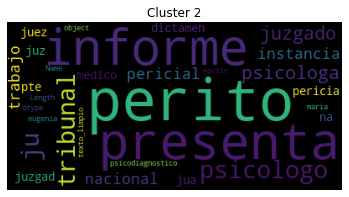

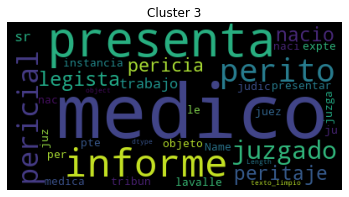

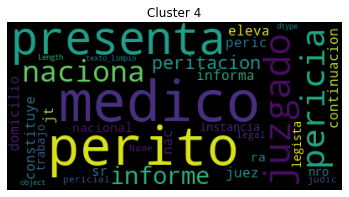

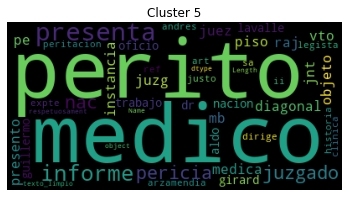

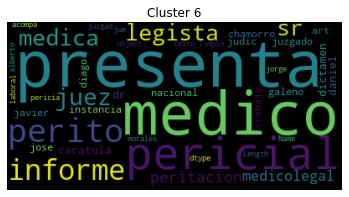

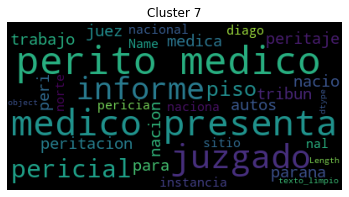

In [32]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud().generate(str(data))
    fig = plt.figure(1, figsize=(6, 6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

#show_wordcloud(dfnr[dfnr.label==5].clean)

for i in range(km_clust.n_clusters):
  

  plt.title('Cluster {}'.format(i))

  show_wordcloud(dfnr[dfnr.label==i].texto_limpio)

#### Latent Dirichlet Allocation

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, stop_words=stop_ws, ngram_range=(1,2), min_df=3)
tf = tf_vectorizer.fit_transform(lemm)
tf_feature_names = tf_vectorizer.get_feature_names()
tf.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(859, 88377)

In [ ]:
lda = LDA(n_components=30, max_iter=15, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda.components_.shape

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 5)

In [ ]:
doc_topic = lda.transform(tf)
lda_labels = [doc_topic[i].argmax() for i in range(doc_topic.shape[0])]
dfnr['lda'] = lda_labels
doc_topic.shape

In [ ]:
BOLD = '\033[1m'
END = '\033[0m'
for i in range(doc_topic.shape[1]):

  print (BOLD+'\n Frases del Cluster {}\n'.format(i)+END,end='\n')
  print (dfnr[dfnr.lda==i].texto_limpio[0:10])

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'label', data=dfnr)
plt.savefig('frecs_kmeans.jpg')

Reduccion de dimensionalidad: tSNE

In [40]:
lda.components_.shape

(30, 88377)

In [41]:
#  incrustación de vecinos estocásticos distribuidos en t

from sklearn.manifold import TSNE
def plot_tsne(model, label):
  X_tsne = TSNE(n_components=2).fit_transform(model)
  tsne_df = pd.DataFrame({'X':X_tsne[:,0],
                          'Y':X_tsne[:,1],
                          'Z':label})
  plt.figure(figsize=(20,10))
  sns.scatterplot(x="X", y="Y",
                hue='Z',
                palette= 'bright',
                legend='full',
                data=tsne_df);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


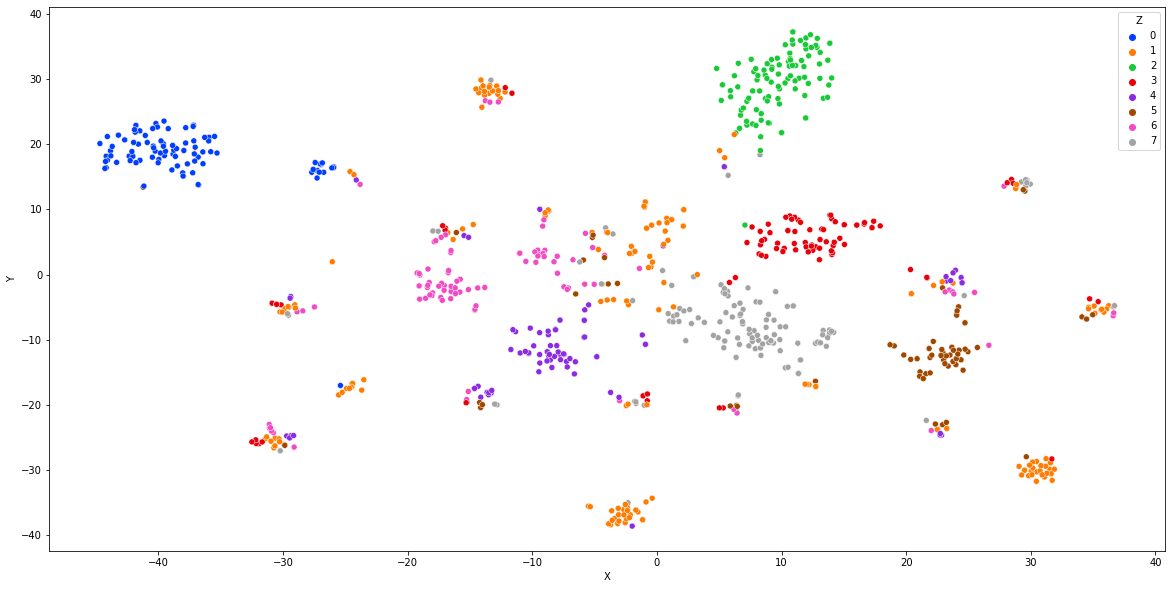

In [42]:
plot_tsne(X1, dfnr.label)# hacemos reduccion de dimensionalidad del modelo de k-means

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


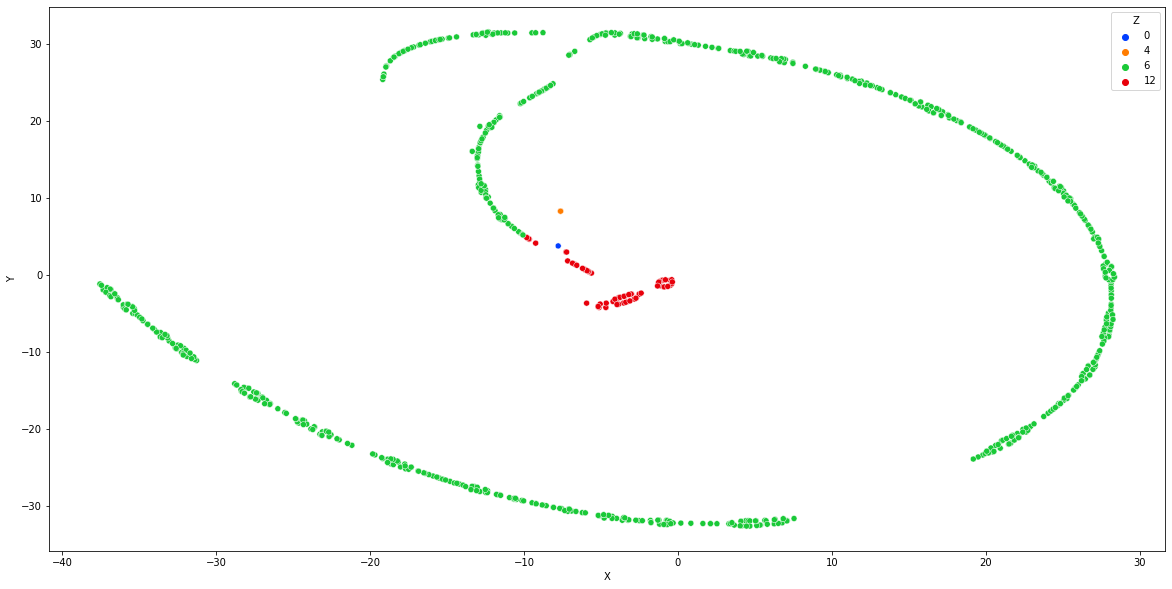

In [43]:
plot_tsne(doc_topic, dfnr.lda)# hacemos reduccion de dimensionalidad de LDA


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


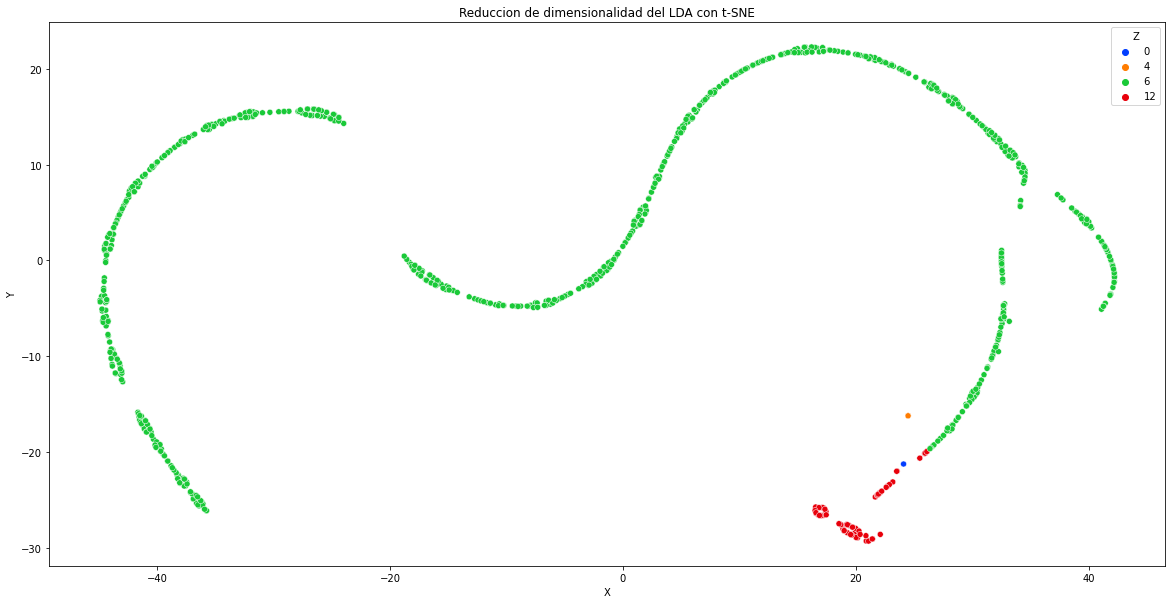

In [44]:
X_tsne = TSNE(n_components=2, perplexity=30).fit_transform(doc_topic)
tsne_df = pd.DataFrame({'X':X_tsne[:,0],
                          'Y':X_tsne[:,1],
                          'Z':dfnr.lda})
plt.figure(figsize=(20,10))
sns.scatterplot(x="X", y="Y",
              hue='Z',
              palette= 'bright',
              legend='full',
              data=tsne_df);
plt.title('Reduccion de dimensionalidad del LDA con t-SNE')
plt.savefig('lda_tsne.jpg')

#### Embeddings pre-entrenados: Word2Vec

In [46]:
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [47]:
########################
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in lemm:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  859


In [48]:
d2v_model = Doc2Vec(all_content_train, vector_size = 100, window = 10, min_count = 5, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)
d2v_model.train(all_content_train, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


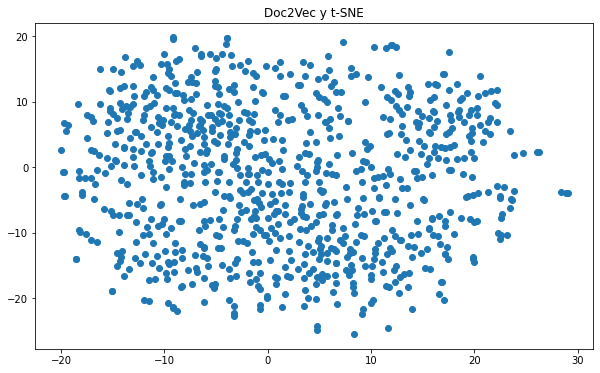

In [49]:
kmeans_model = KMeans(n_clusters=4, init="k-means++", max_iter=100) 
Xsvd = TruncatedSVD(n_components=30).fit(d2v_model.docvecs.vectors_docs)
Xsvd = Xsvd.transform(d2v_model.docvecs.vectors_docs)
X = kmeans_model.fit(Xsvd)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(Xsvd)
pca = TSNE(n_components=2).fit(Xsvd)
datapoint = pca.fit_transform(Xsvd)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.figure
#label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
#color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1])
#centroids = kmeans_model.cluster_centers_
#centroidpoint = pca.transform(centroids)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")

plt.title('Doc2Vec y t-SNE')
plt.savefig('d2v_tsne.jpg')
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizertfidf = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=stop_ws)
tfidf = vectorizertfidf.fit_transform(dfnr.texto_limpio)
tfidf_featurenames = vectorizertfidf.get_feature_names()
print("Nro de filas/documentos: %s  \nNro de columnas/tokens %s" % tfidf.toarray().shape)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Nro de filas/documentos: 859  
Nro de columnas/tokens 24365


In [51]:
tfvectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words=stopws)
tf = tfvectorizer.fit_transform(dfnr.texto_limpio)
tf_featurenames = tfvectorizer.get_feature_names()
print("Nro de filas/documentos: %s  \nNro de columnas/tokens %s" % tf.toarray().shape)

Nro de filas/documentos: 859  
Nro de columnas/tokens 24332


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
# Se modelan los temas con NMF y LDA y se muestran las palabras más representativas de cada tema:

# NMF- Factorización de matrices no negativas. Se busca reducir las dimensiones en los datos y que surjan ciertas características que permanecen ocultas a priori.

# LDA- Latent Dirichlet Allocation. Método probabilístico para el modelado de temas.


from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print()

        
no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=12, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=12).fit(tf)

no_top_words = 5

display_topics(nmf, tfidf_featurenames, no_top_words)
display_topics(lda, tf_featurenames, no_top_words)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


Topic 0:
columna dolor lumbar cervical normal
Topic 1:
tecnicas casa presente persona psicologico
Topic 2:
rodilla menisco cruzado izquierda ligamento
Topic 3:
graduada prueba transcriptos obrero parcial
Topic 4:
mano dedo pulgar dedos falange
Topic 5:
rta respondido desprende transcripcion apartado
Topic 6:
remito punto particularidad item afectadas
Topic 7:
editorial enfermedad sala interconsulta arts
Topic 8:
tobillo pie esguince peroneo derecho
Topic 9:
hombro manguito supraespinoso tendon rotador
Topic 10:
contestado fojas burgue rodolfo tfk
Topic 11:
remitirse respuesta montevideo jmoralesver morales
Topic 12:
eca mu izquierda cubital mano
Topic 13:
normal aqueja minimamente individuo resultado
Topic 14:
idem texto fdo referendum mn
Topic 15:
parraguez asociar santiago codo tendinitis
Topic 16:
obrante aseguradora detalla plan solicitados
Topic 17:
adjunto punto genovese acontecimiento especial
Topic 18:
ipp destaco probanzas fs pide
Topic 19:
rvan pocztaruk miembros raiz movilid

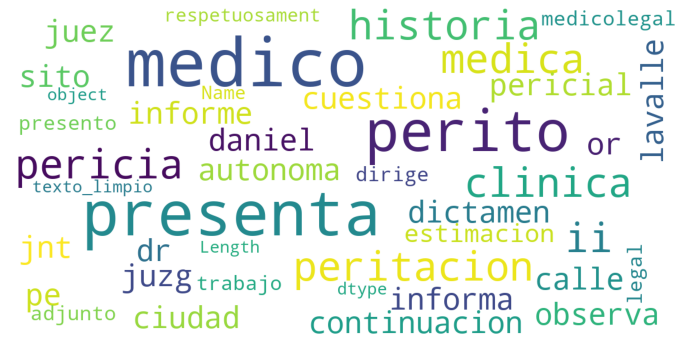

In [53]:
stopws = set(stopwords.words('spanish'))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopws,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dfnr.texto_limpio)